# Cleaning and EDA

In [1]:
#importing some braries
import pandas as pd
import numpy as np

In [2]:
# reading the book frame
books = pd.read_csv('book_info.csv').drop('Unnamed: 0', axis=1)
books.head()

,author,mean_rating,num_ratings,num_reviews,title,url
0,Jojo Moyes,4.17,"96,193 ratings","9,442 reviews",Still Me,https://www.goodreads.com/book/show/35791968-s...
1,Tayari Jones,3.98,"134,415 ratings","13,895 reviews",An American Marriage,https://www.goodreads.com/book/show/33590210-a...
2,Fredrik Backman,4.35,"45,036 ratings","6,608 reviews",Us Against You,https://www.goodreads.com/book/show/36373463-u...
3,Liane Moriarty,3.52,"105,514 ratings","12,408 reviews",Nine Perfect Strangers,https://www.goodreads.com/book/show/39280445-n...
4,Hank Green,4.06,"32,049 ratings","6,203 reviews",An Absolutely Remarkable Thing,https://www.goodreads.com/book/show/38186611-a...


In [3]:
# reeading the review frame
reviews = pd.read_csv('main_reviews_df.csv').drop('Unnamed: 0', axis=1)
reviews.head()

,isbn,likes,rating,title,user_id,user_name
0,0399562451,390,3,Still Me,9684061,Melissa
1,0399562451,309,3,Still Me,5032725,Debra
2,0399562451,262,5,Still Me,31840755,Ihcene
3,0399562451,208,5,Still Me,665584,Alejandro
4,0399562451,189,5,Still Me,57991562,Pauline


In [4]:
len(reviews)

123801

In [9]:
# dropping duplicates by title
books = books.drop_duplicates(subset=['title'])

In [8]:
# checking for number of unique titles in reviews
reviews.title.nunique()

395

In [12]:
# dropping any possible duplicates and we still have plenty of data to work with
reviews = reviews.drop_duplicates()
len(reviews)

113248

In [11]:
# merging!
df = reviews.merge(books, how='left', on='title')
len(df)

113248

In [15]:
# dropping unneeded column
df = df.drop('url', axis=1)

In [17]:
# checking for number of reviews by title
df.groupby(['title']).count()['user_id'].sort_values(ascending=False)

title
The Tattooist of Auschwitz                                                                                                                                                            303
The Land: Predators                                                                                                                                                                   300
The Sawbones Book: The Hilarious, Horrifying Road to Modern Medicine                                                                                                                  300
The Future of Humanity: Terraforming Mars, Interstellar Travel, Immortality, and Our Destiny Beyond Earth                                                                             300
Rise and Kill First: The Secret History of Israel's Targeted Assassinations                                                                                                           300
The Path Between Us: An Enneagram Journey to Healthy Relationshi

In [18]:
# double checking for dups
df[df.duplicated()]

,isbn,likes,rating,title,user_id,user_name,author,mean_rating,num_ratings,num_reviews


In [19]:
# checking for isbns that are missing
df[df.isbn == 'empty']

,isbn,likes,rating,title,user_id,user_name,author,mean_rating,num_ratings,num_reviews
21783,empty,510,1,The Help,905324,Caroline,Kathryn Stockett,4.46,"1,874,160 ratings","81,826 reviews"
21784,empty,441,4,The Help,406752,Joe,Kathryn Stockett,4.46,"1,874,160 ratings","81,826 reviews"
21785,empty,377,5,The Help,542037,Annalisa,Kathryn Stockett,4.46,"1,874,160 ratings","81,826 reviews"
21786,empty,293,1,The Help,536912,Maegen,Kathryn Stockett,4.46,"1,874,160 ratings","81,826 reviews"
21787,empty,270,2,The Help,2927182,Ellen,Kathryn Stockett,4.46,"1,874,160 ratings","81,826 reviews"
21788,empty,263,4,The Help,14596170,Lola,Kathryn Stockett,4.46,"1,874,160 ratings","81,826 reviews"
21789,empty,236,5,The Help,45618,karen,Kathryn Stockett,4.46,"1,874,160 ratings","81,826 reviews"
21790,empty,222,5,The Help,41788524,Kai,Kathryn Stockett,4.46,"1,874,160 ratings","81,826 reviews"
21791,empty,206,5,The Help,50966861,Majenta,Kathryn Stockett,4.46,"1,874,160 ratings","81,826 reviews"
21792,empty,184,4,The Help,7365405,James,Kathryn Stockett,4.46,"1,874,160 ratings","81,826 reviews"


In [23]:
df.loc[df.title == 'The Help', 'isbn']

21783    empty
21784    empty
21785    empty
21786    empty
21787    empty
21788    empty
21789    empty
21790    empty
21791    empty
21792    empty
21793    empty
21794    empty
21795    empty
21796    empty
21797    empty
21798    empty
21799    empty
21800    empty
21801    empty
21802    empty
21803    empty
21804    empty
21805    empty
21806    empty
21807    empty
21808    empty
21809    empty
21810    empty
21811    empty
21812    empty
         ...  
22049    empty
22050    empty
22051    empty
22052    empty
22053    empty
22054    empty
22055    empty
22056    empty
22057    empty
22058    empty
22059    empty
22060    empty
22061    empty
22062    empty
22063    empty
22064    empty
22065    empty
22066    empty
22067    empty
22068    empty
22069    empty
22070    empty
22071    empty
22072    empty
22073    empty
22074    empty
22075    empty
22076    empty
22077    empty
22078    empty
Name: isbn, Length: 296, dtype: object

In [24]:
# mapping isbns to ones that are missing
df.loc[df.title == 'The Help', 'isbn'] = '0425232204'
df.loc[df.title == 'Gone Girl', 'isbn'] = '0307588378'
df.loc[df.title == 'The Fault in Our Stars', 'isbn'] = '014242417X'
df.loc[df.title == 'This Will Only Hurt a Little', 'isbn']  = '1508268827'
df.loc[df.title == "I'll Be Gone in the Dark: One Woman's Obsessive Search for the Golden State Killer",
       'isbn'] = '0062319787'
df.loc[df.title == 'Whiskey in a Teacup: What Growing Up in the South Taught Me About Life, Love, & Baking Biscuits',
       'isbn'] = '1501166271'
df.loc[df.title == 'Atomic Habits: An Easy & Proven Way to Build Good Habits & Break Bad Ones', 'isbn'] = '0735211299'
df.loc[df.title == 'The Feather Thief: Beauty, Obsession, and the Natural History Heist of the Century',
       'isbn'] = '1101981636'
df.loc[df.title == 'Becoming', 'isbn'] = '1524763136'
df.loc[df.title == 'Cook Like a Pro: Recipes and Tips for Home Cooks', 'isbn'] = '0804187045'
df.loc[df.title == 'Sweet Revenge: Passive-Aggressive Desserts for Your Exes & Enemies', 'isbn'] = '1630790893'
df.loc[df.title == 'Skinnytaste One and Done: 140 No-Fuss Dinners for Your Instant Pot®, Slow Cooker, Air Fryer, Sheet Pan, Skillet, Dutch Oven, and More: 140 No-Fuss Dinners Sheet Pan, Skillet, Dutch Oven, and More', 
       'isbn'] = '1524762156'
df.loc[df.title == 'Now & Again: Go-To Recipes, Inspired Menus + Endless Ideas for Reinventing Leftovers', 
       'isbn'] = '1452164967',
df.loc[df.title == 'Saga, Vol. 8','isbn'] = '1534303499'
df.loc[df.title == 'A Love Letter from the Girls Who Feel Everything','isbn'] = '1732747903'
df.loc[df.title == 'Truly Devious', 'isbn'] = '0062338056'
df.loc[df.title == 'I Was Born for This', 'isbn'] = '000824409X'
df.loc[df.title == 'Lulu is a Rhinoceros', 'isbn'] = '0692070982'
df.loc[df.title == 'Prince & Knight', 'isbn'] = '1338564641'   

In [25]:
# checking to make sure it worked
df[df.isbn == 'empty']

,isbn,likes,rating,title,user_id,user_name,author,mean_rating,num_ratings,num_reviews


In [27]:
df.head()

,isbn,likes,rating,title,user_id,user_name,author,mean_rating,num_ratings,num_reviews
0,0399562451,390,3,Still Me,9684061,Melissa,Jojo Moyes,4.17,"96,193 ratings","9,442 reviews"
1,0399562451,309,3,Still Me,5032725,Debra,Jojo Moyes,4.17,"96,193 ratings","9,442 reviews"
2,0399562451,262,5,Still Me,31840755,Ihcene,Jojo Moyes,4.17,"96,193 ratings","9,442 reviews"
3,0399562451,208,5,Still Me,665584,Alejandro,Jojo Moyes,4.17,"96,193 ratings","9,442 reviews"
4,0399562451,189,5,Still Me,57991562,Pauline,Jojo Moyes,4.17,"96,193 ratings","9,442 reviews"


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113248 entries, 0 to 113247
Data columns (total 10 columns):
isbn           113248 non-null object
likes          113248 non-null int64
rating         113248 non-null int64
title          113248 non-null object
user_id        113248 non-null int64
user_name      113248 non-null object
author         113248 non-null object
mean_rating    113248 non-null float64
num_ratings    113248 non-null object
num_reviews    113248 non-null object
dtypes: float64(1), int64(3), object(6)
memory usage: 9.5+ MB


In [41]:
# saving final df!
df.to_csv('final_df.csv')

In [131]:
# checking for number of users who have at least 5 reviews
(df.user_id.value_counts() >= 5).sum()

3772

In [44]:
# creating filter for df to only look at reviews from users with at least 5 reviews
filtered = df.groupby('user_id').filter(lambda x: len(x) >= 5)

In [49]:
# checking to see if the filter worked before making it permanent
df[df.isin(filtered)].dropna().user_id.value_counts()

4622890.0     86
597461.0      79
10171516.0    67
14596170.0    62
13126933.0    58
7582369.0     58
49148508.0    57
1277371.0     54
11183856.0    50
4159922.0     49
17438949.0    49
54835325.0    49
16219087.0    48
5872506.0     48
3030788.0     48
4213258.0     48
13650342.0    46
1072080.0     46
4852457.0     46
14514998.0    46
68030.0       46
269235.0      45
1045774.0     45
1880531.0     44
58160628.0    43
26560207.0    42
28266634.0    41
15335689.0    40
2473504.0     40
4379514.0     39
              ..
23384676.0     5
31787045.0     5
5454021.0      5
26560507.0     5
4105905.0      5
28892382.0     5
2202325.0      5
45526328.0     5
26555647.0     5
70479517.0     5
111921.0       5
2426006.0      5
9202801.0      5
6145504.0      5
48564.0        5
9080319.0      5
58134125.0     5
58121880.0     5
5937919.0      5
125546.0       5
4600913.0      5
10249988.0     5
5588092.0      5
7552897.0      5
416888.0       5
59357213.0     5
39111404.0     5
41356020.0    

In [50]:
new_df = df[df.isin(filtered)].dropna()

In [52]:
# double checking again and values match!
new_df.user_id.nunique()

3772

In [62]:
new_df.head()

,isbn,likes,rating,title,user_id,user_name,author,mean_rating,num_ratings,num_reviews
0,0399562451,390,3,Still Me,9684061,Melissa,Jojo Moyes,4.17,96193,"9,442 reviews"
1,0399562451,309,3,Still Me,5032725,Debra,Jojo Moyes,4.17,96193,"9,442 reviews"
3,0399562451,208,5,Still Me,665584,Alejandro,Jojo Moyes,4.17,96193,"9,442 reviews"
4,0399562451,189,5,Still Me,57991562,Pauline,Jojo Moyes,4.17,96193,"9,442 reviews"
5,0399562451,169,4,Still Me,5872506,Larry H,Jojo Moyes,4.17,96193,"9,442 reviews"


In [109]:
# cleaning likes column
df.likes = df.likes.str.strip(' likes')
df.likes = df.likes.fillna(0)

In [110]:
df.likes.value_counts().head()

0    6157
1    3935
2    2434
3    1484
4    1036
Name: likes, dtype: int64

In [55]:
# converting some columns to ints for some reason they changed to floats
new_df.likes = new_df.likes.astype(int)

In [57]:
new_df.rating = new_df.rating.astype(int)

In [59]:
new_df.user_id = new_df.user_id.astype(int)

In [61]:
# cleaningr atings column
new_df.num_ratings = new_df.num_ratings.str.strip(' ratings').str.replace(',','').astype(int)

In [63]:
new_df.num_ratings.dtype

dtype('int32')

In [65]:
new_df.head()

,isbn,likes,rating,title,user_id,user_name,author,mean_rating,num_ratings,num_reviews
0,0399562451,390,3,Still Me,9684061,Melissa,Jojo Moyes,4.17,96193,9442
1,0399562451,309,3,Still Me,5032725,Debra,Jojo Moyes,4.17,96193,9442
3,0399562451,208,5,Still Me,665584,Alejandro,Jojo Moyes,4.17,96193,9442
4,0399562451,189,5,Still Me,57991562,Pauline,Jojo Moyes,4.17,96193,9442
5,0399562451,169,4,Still Me,5872506,Larry H,Jojo Moyes,4.17,96193,9442


In [64]:
# cleaning num_reviews column
new_df.num_reviews = new_df.num_reviews.str.strip(' reviews').str.replace(',','').astype(int)
new_df.num_reviews.dtype

dtype('int32')

In [66]:
df = df[['user_name', 'user_id', 'title', 'author', 'isbn', 'rating', 'likes', 'mean_rating', 'num_ratings', 'num_reviews']]
df.head()

,user_name,user_id,title,author,isbn,rating,likes,mean_rating,num_ratings,num_reviews
0,Melissa,9684061,Still Me,Jojo Moyes,0399562451,3,390,4.17,"96,193 ratings","9,442 reviews"
1,Debra,5032725,Still Me,Jojo Moyes,0399562451,3,309,4.17,"96,193 ratings","9,442 reviews"
2,Ihcene,31840755,Still Me,Jojo Moyes,0399562451,5,262,4.17,"96,193 ratings","9,442 reviews"
3,Alejandro,665584,Still Me,Jojo Moyes,0399562451,5,208,4.17,"96,193 ratings","9,442 reviews"
4,Pauline,57991562,Still Me,Jojo Moyes,0399562451,5,189,4.17,"96,193 ratings","9,442 reviews"


In [67]:
new_df.author.nunique()

376

# Model Building

In [68]:
# importing some more braries!
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import cross_validate, train_test_split
from surprise import Reader, Dataset
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import RandomizedSearchCV

In [70]:
# converting data to dataset object surprise can understand
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(new_df[['user_id','title','rating']],reader)
train, test = train_test_split(data, test_size=.2)

In [80]:
# baseline model
baseline = SVD()
baseline.fit(train)
preds = baseline.test(test)
print(accuracy.rmse(preds))

RMSE: 0.8892
0.8891540330526717


In [73]:
# runnign randomized search on SVD
params = {'n_factors': [1,5,10,25,50,75,100], 'reg_all': [.005,.01,.02,.05,.1,.25,.5], 'lr_all':[.005,.01,.02,.05,.1,.25,.5],
         'n_epochs': [10,20,50]}
model = RandomizedSearchCV(SVD,param_distributions=params,n_jobs=-1,joblib_verbose=10, cv=5)
model.fit(data)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   33.9s finished


In [74]:
# best params and score
print(model.best_score)
print(model.best_params)

{'rmse': 0.869675850733404, 'mae': 0.6789961605640339}
{'rmse': {'n_factors': 5, 'reg_all': 0.1, 'lr_all': 0.02, 'n_epochs': 10}, 'mae': {'n_factors': 5, 'reg_all': 0.1, 'lr_all': 0.02, 'n_epochs': 10}}


In [102]:
# now checking best params specifically on test set
better = SVD(n_factors=5,reg_all=.1,lr_all=.02,n_epochs=10)
better.fit(train)
better_preds = better.test(test)
accuracy.rmse(better_preds)

RMSE: 0.8777


0.8776572813420881

In [76]:
# even more braries!
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

RMSE: 0.8773
RMSE: 0.8772
RMSE: 0.8775
RMSE: 0.8773
RMSE: 0.8771
RMSE: 0.8774
RMSE: 0.8770
RMSE: 0.8768
RMSE: 0.8782
RMSE: 0.8770
RMSE: 0.8775
RMSE: 0.8780
RMSE: 0.8773
RMSE: 0.8770
RMSE: 0.8781
RMSE: 0.8772
RMSE: 0.8764
RMSE: 0.8779
RMSE: 0.8772
RMSE: 0.8780


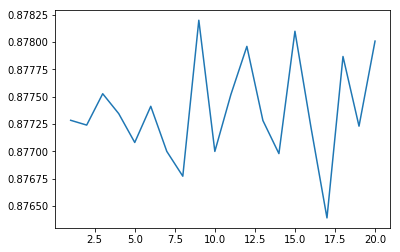

In [105]:
# diving deeper into the hyperparameters. i went up and down the next several cells and played around with the numbers
n_factors = range(1,21)
scores = []
for x in n_factors:
    model = SVD(n_factors=x,reg_all=.1,lr_all=.02,n_epochs=10)
    model.fit(train)
    preds = model.test(test)
    acc = accuracy.rmse(preds)
    scores.append(acc)
sns.lineplot(n_factors, scores);

RMSE: 0.8795
RMSE: 0.8782
RMSE: 0.8769
RMSE: 0.8773
RMSE: 0.8771
RMSE: 0.8775


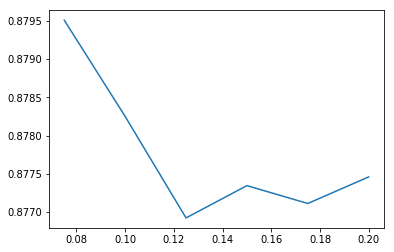

In [109]:
reg_all = [.075,.1,.125,.15,.175,.2]
scores = []
for x in reg_all:
    model = SVD(n_factors=17,reg_all=x,lr_all=.02,n_epochs=10)
    model.fit(train)
    preds = model.test(test)
    acc = accuracy.rmse(preds)
    scores.append(acc)
sns.lineplot(reg_all, scores);

RMSE: 0.8799
RMSE: 0.8793
RMSE: 0.8784
RMSE: 0.8784
RMSE: 0.8773
RMSE: 0.8777
RMSE: 0.8772
RMSE: 0.8773
RMSE: 0.8771
RMSE: 0.8775
RMSE: 0.8772
RMSE: 0.8789
RMSE: 0.8800
RMSE: 0.8852
RMSE: 0.8878


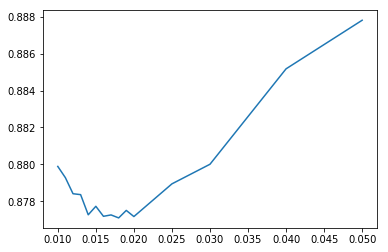

In [112]:
lr_all = [.01,.011,.012,.013,.014,.015,.016,.017,.018,.019,.02,.025,.03,.04,.05]
scores = []
for x in lr_all:
    model = SVD(n_factors=17,reg_all=.125,lr_all=x,n_epochs=10)
    model.fit(train)
    preds = model.test(test)
    acc = accuracy.rmse(preds)
    scores.append(acc)
sns.lineplot(lr_all, scores);

RMSE: 0.8765
RMSE: 0.8767
RMSE: 0.8767
RMSE: 0.8765
RMSE: 0.8764
RMSE: 0.8766
RMSE: 0.8768
RMSE: 0.8762
RMSE: 0.8771
RMSE: 0.8775
RMSE: 0.8763
RMSE: 0.8782
RMSE: 0.8784
RMSE: 0.8772
RMSE: 0.8770
RMSE: 0.8786
RMSE: 0.8786
RMSE: 0.8805
RMSE: 0.8810
RMSE: 0.8805


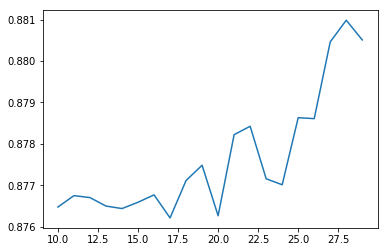

In [114]:
n_epochs = range(10,30)
scores = []
for x in n_epochs:
    model = SVD(n_epochs=x, lr_all=.015, reg_all=.125, n_factors=17)
    model.fit(train)
    preds = model.test(test)
    acc = accuracy.rmse(preds)
    scores.append(acc)
sns.lineplot(n_epochs, scores)

In [115]:
# seemingly best SVD model
model = SVD(n_epochs=17, lr_all=.015, reg_all=.125, n_factors=17)
model.fit(train)
preds = model.test(test)
accuracy.rmse(preds)
accuracy.mae(preds)

RMSE: 0.8769
MAE:  0.6823


0.6822510201594242

In [129]:
# yes more brarires this time looking at various KNN models. Not running randomized search because it causes a memory error on my local machine
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline, KNNWithZScore

In [117]:
# creating parameter ranges
k = range(1,18)
name = ['cosine','msd', 'pearson', 'pearson_baseline']
user_based = [True, False]
sim_options = {'name': name, 'user_based':user_based}
params = {'k':k, 'sim_options':sim_options}

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.2685
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.1048
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0349
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0055
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9888
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9757
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9680
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9614
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9583
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9532
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9508
Computing the msd similarity matrix...
Done computing 

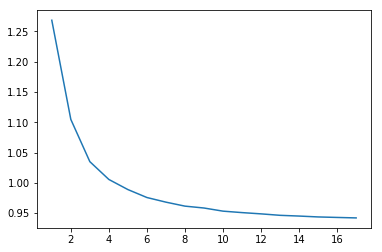

In [121]:
# seemingly worse than SVD, but will test out several models to see if it can improve
scores = []
for x in k:
    model = KNNBasic(k=x)
    model.fit(train)
    preds = model.test(test)
    acc = accuracy.rmse(preds)
    scores.append(acc)
sns.lineplot(k, scores)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9795
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9532
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0267
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0028


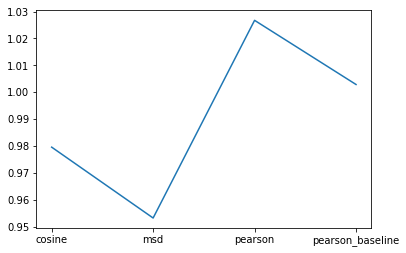

In [124]:
scores = []
for x in name:
    model = KNNBasic(sim_options={'name':x}, k=10)
    model.fit(train)
    preds = model.test(test)
    acc = accuracy.rmse(preds)
    scores.append(acc)
sns.lineplot(name, scores)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9532
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9562


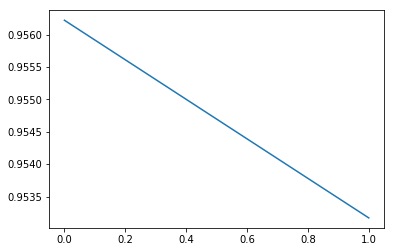

In [123]:
scores = []
for x in user_based:
    model = KNNBasic(sim_options={'user_based':x, 'name': 'msd'}, k=10)
    model.fit(train)
    preds = model.test(test)
    acc = accuracy.rmse(preds)
    scores.append(acc)
sns.lineplot(user_based, scores)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.1389
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0244
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9781
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9601
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9497
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9408
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9350
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9313
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9293
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9254
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9242
Computing the msd similarity matrix...
Done computing 

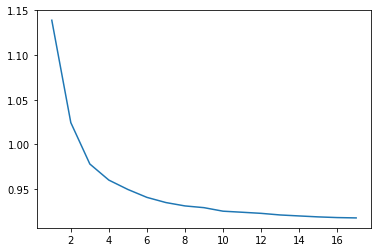

In [122]:
scores = []
for x in k:
    model = KNNWithMeans(k=x)
    model.fit(train)
    preds = model.test(test)
    acc = accuracy.rmse(preds)
    scores.append(acc)
sns.lineplot(k, scores)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9324
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9254
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9730
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9559


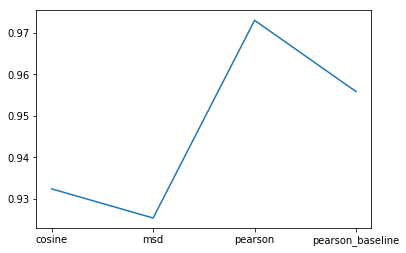

In [125]:
scores = []
for x in name:
    model = KNNWithMeans(sim_options={'name':x}, k=10)
    model.fit(train)
    preds = model.test(test)
    acc = accuracy.rmse(preds)
    scores.append(acc)
sns.lineplot(name, scores)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9254
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9123


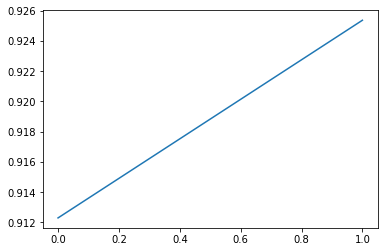

In [127]:
scores = []
for x in user_based:
    model = KNNWithMeans(sim_options={'user_based':x, 'name': 'msd'}, k=10)
    model.fit(train)
    preds = model.test(test)
    acc = accuracy.rmse(preds)
    scores.append(acc)
sns.lineplot(user_based, scores)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.1461
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0381
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9877
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9682
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9560
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9471
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9409
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9366
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9344
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9300
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9284
Computing the msd similarity matrix...
Done computing 

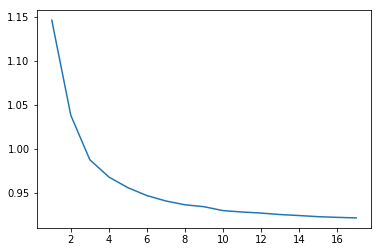

In [130]:
scores = []
for x in k:
    model = KNNWithZScore(k=x)
    model.fit(train)
    preds = model.test(test)
    acc = accuracy.rmse(preds)
    scores.append(acc)
sns.lineplot(k, scores)

In [135]:
# one last methot to import to export the final model!
from surprise.dump import dump
model = SVD(n_epochs=17, lr_all=.015, reg_all=.125, n_factors=17)
model.fit(train)
preds = model.test(test)
accuracy.rmse(preds)
accuracy.mae(preds)

RMSE: 0.8769
MAE:  0.6825


0.6825260376880067

In [136]:
# exporting the model
dump('book_recommender.py', predictions=preds, algo=model, verbose=1)

The dump has been saved as file book_recommender.py
